In [3]:
#importing packages and their models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE


In [4]:
#Loading the dataset
df = pd.read_csv('creditcard.csv')
print("Dataset shape:", df.shape)
print("First five rows:\n", df.head())

Dataset shape: (284807, 31)
First five rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 

In [5]:
#Data Analysis
print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [6]:
#Checking for Missing Values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


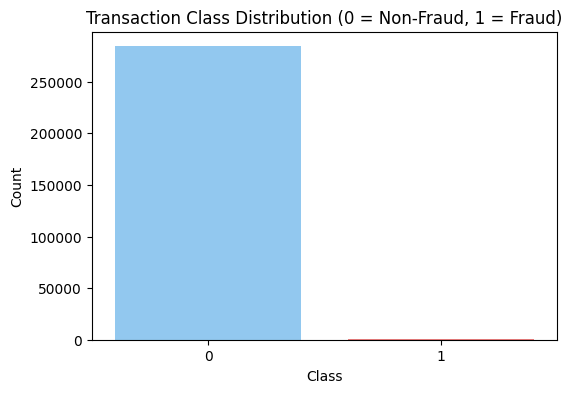

In [7]:
#Class Distribution Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, hue='Class', palette=['#82caff', '#ff6b6b'])
plt.legend([], [], frameon=False)  # Remove the legend as it's redundant
plt.title('Transaction Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [9]:
#Data Pre-Processing
#Handle Missing Values
df.dropna(inplace=True)

features = df.drop('Class', axis=1)
target = df['Class']

#Scalling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['Class'] = target.values

In [10]:
#Train_Test_split
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (199364, 30)
Test set shape: (85443, 30)


In [11]:
#Using SMOTE to handle class Imbalance
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("\nAfter SMOTE, training set shape:", X_train_sm.shape)
print("Class distribution in SMOTE training set:")
print(pd.Series(y_train_sm).value_counts())


After SMOTE, training set shape: (398040, 30)
Class distribution in SMOTE training set:
Class
0    199020
1    199020
Name: count, dtype: int64


In [12]:
#Using Random Forest Classifier
clf = RandomForestClassifier(random_state=42)  # Using default hyperparameters
clf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [13]:
#Model prediction with Threshold adjustments for test data
y_proba = clf.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred = (y_proba >= threshold).astype(int)


In [14]:
#Classification Report
print("\nClassification Report (threshold = {}):".format(threshold))
print(classification_report(y_test, y_pred))

#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)


Classification Report (threshold = 0.3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.72      0.84      0.78       148

    accuracy                           1.00     85443
   macro avg       0.86      0.92      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [15]:
#Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9624713434930915


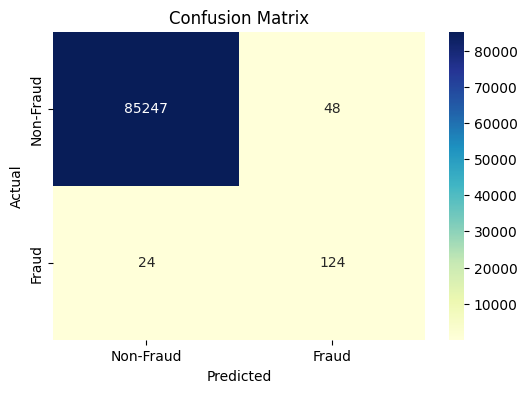

In [16]:
#Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

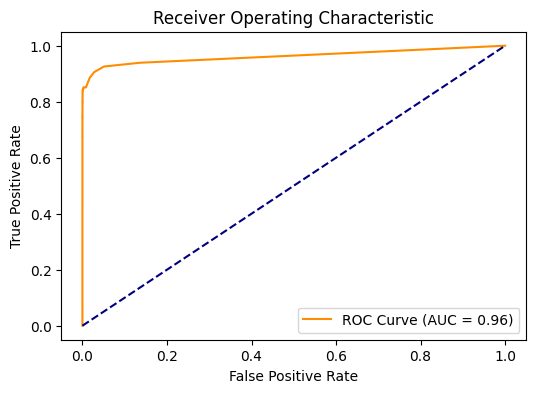

In [17]:
#Plotting ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()